<a href="https://colab.research.google.com/github/imnadiarasheed/DIP/blob/main/Assign_2(MCACCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import cv2 as cv
import math as m
import matplotlib.pyplot as plt

In [147]:
# yourimage     givenImage      label       number
# 0             0               TN          2*0 + 0 = 0
# 0             1               FN          2*0 + 1 = 1
# 1             0               FP          2*1 + 0 = 2
# 1             1               TP          2*1 + 1 = 3
# where 0 is background 1 is foreground

# yourimage     givenImage      label       number
# 255           255             TN          2*255 + 255 = 765 = 253 + 3 = 0 *63 = 0(as ans will not exceed 255)
# 255           0               FN          2*255 + 0 = 510 = 254 + 3 = 1 *63 = 63
# 0             255             FP          2*0 + 255 = 255 = 255 + 3 = 2 *63 = 126
# 0             0               TP          2*0 + 0 = 0 = 0 + 3 = 3 *63 = 189
# where 255 is background 0 is foreground
def performancePrams(yourImage, givenImage):
    output = (((yourImage * 2) + givenImage) + 3)*63
    unique_elements, counts = np.unique(output, return_counts=True)
    #print(unique_elements, counts)
    TN, FN, FP, TP = counts
    ACC = (TP + TN)/ (TP + TN + FP + FN)
    TPR = TP / (TP + FN)
    FPR = FP / (TN + FP)
    diceCoff = 2*TP / (FN + (2*TP) + FP)
    print([ACC, TPR, FPR, diceCoff])

    labelled_image = np.zeros((output.shape[0], output.shape[1],3), dtype=int)
    for x in range(0, output.shape[0]):
      for y in range(0, output.shape[1]):
        if (output[x,y] == unique_elements[0]):
          labelled_image[x,y] = (0,0,0)
        elif (output[x,y] == unique_elements[1]):
          labelled_image[x,y] = (0,255,0)
        elif (output[x,y] == unique_elements[2]):
          labelled_image[x,y] = (255,0,0)
        elif (output[x,y] == unique_elements[3]):
          labelled_image[x,y] = (255,255,255)
    return labelled_image



def morphology(image, kernel):
    array = image[:]
    print("Start Morphological Operation")
    array = cv.morphologyEx(array, cv.MORPH_GRADIENT, kernel)
    for i in range(0, 2):
        array = cv.morphologyEx(array, cv.MORPH_DILATE, kernel)
        array = cv.morphologyEx(array, cv.MORPH_ERODE, kernel)
    kernel1 = np.ones((3, 3), np.uint8)
    array = cv.morphologyEx(array, cv.MORPH_ERODE, kernel1)

    # print("normalization max min", np.max(array), np.min(array))
    # row, col = np.shape(array)
    # minn, maxx = np.min(array), np.max(array)
    # for i in range(0, row):
    #     for j in range(0, col):
    #         array[i][j] = f.normalization(array[i][j], minn, maxx)
    #         array[i][j] = f.normalization(array[i][j], 255, 0)
    array = 255 - array
    ret, tarray = cv.threshold(array,242,255,cv.THRESH_BINARY)
    return tarray



# Parameters
# image	8-bit input image.
# edges	output edge map; single channels 8-bit image, which has the same size as image .
# threshold1	first threshold for the hysteresis procedure.
# threshold2	second threshold for the hysteresis procedure.
# apertureSize	aperture size for the Sobel operator.
# L2gradient	a flag, indicating whether a more accurate L2 norm =(dI/dx)2+(dI/dy)2√ should be used to calculate
# the image gradient magnitude ( L2gradient=true ),
# or whether the default L1 norm =|dI/dx|+|dI/dy| is enough ( L2gradient=false ).
def canny(image):
    array = image[:]
    print("Start Canny Operation")
    # array = cv.blur(array, (5, 5))
    # array = cv.Canny(array, 1, 20, L2gradient=False)
    array = cv.Canny(array,30,30, L2gradient = False)
    array = 255 - array
    return array



def connected_component_label(image):

    # Applying cv.connectedComponents() 
    num_labels, labels = cv.connectedComponents(image)
    #print(labels)

    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    return labeled_img

In [148]:
imageArray = cv.imread('drive/MyDrive/images/assign-2/IM000004.JPG', 0)
vesselimage = cv.imread('drive/MyDrive/images/assign-2/IM000004--vessels.jpg',0)
ret, vesselimage = cv.threshold(vesselimage, 245, 255, cv.THRESH_BINARY)

Start Morphological Operation
[0.9199980053191489, 0.5652251541121636, 0.052988586017012215, 0.49994805108448553]


(<matplotlib.image.AxesImage at 0x7fd5feb42070>, (-0.5, 1503.5, 999.5, -0.5))

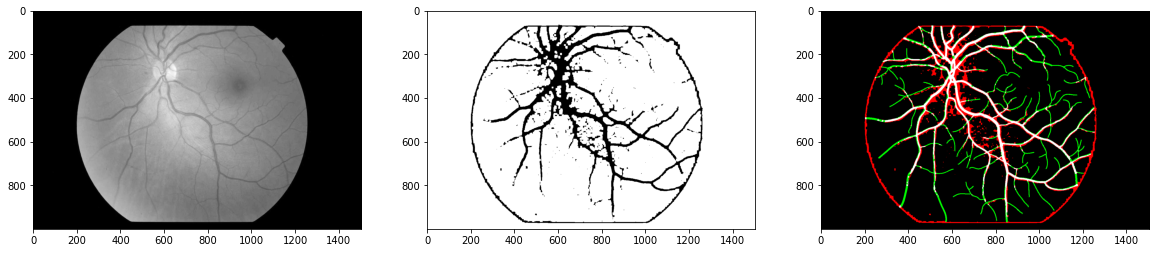

In [149]:
# Morphology
kernel = np.ones((6, 6), np.uint8)
resMorph = morphology(imageArray, kernel)
labelled_image = performancePrams(resMorph, vesselimage)

# create figure
fig = plt.figure(figsize=(20, 20))

# setting values to rows and column variables
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(imageArray, cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 2)
plt.imshow(resMorph, cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 3)
plt.imshow(labelled_image), plt.axis('on')

Start Canny Operation
[0.926471409574468, 0.17016238159675237, 0.015941081180093648, 0.2466979557638468]


(<matplotlib.image.AxesImage at 0x7fd5fea27a30>, (-0.5, 1503.5, 999.5, -0.5))

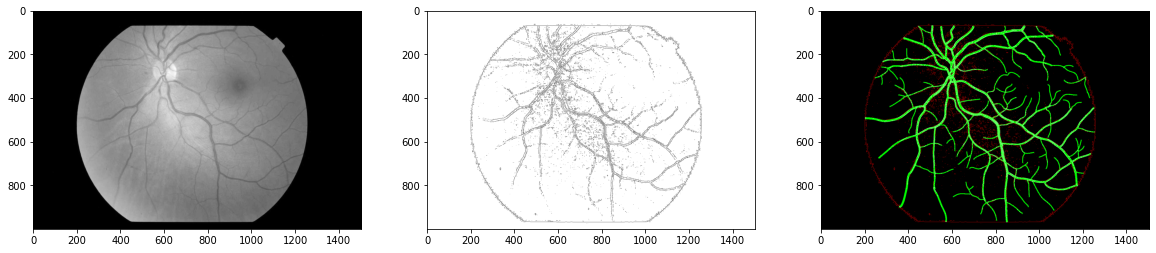

In [150]:
# Canny
resCanny = canny(imageArray)
labelled_image = performancePrams(resCanny, vesselimage)

# create figure
fig = plt.figure(figsize=(20, 20))

# setting values to rows and column variables
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(imageArray, cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 2)
plt.imshow(resCanny, cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 3)
plt.imshow(labelled_image), plt.axis('on')

Start Adaptive Thresholding Operation
[0.920253324468085, 0.5467598857314689, 0.05130782836666705, 0.4924441510408071]


(<matplotlib.image.AxesImage at 0x7fd5fe91a670>, (-0.5, 1503.5, 999.5, -0.5))

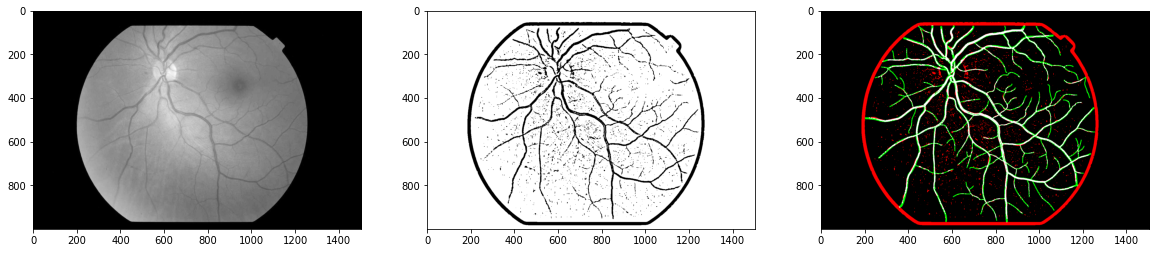

In [151]:
# Adaptive thresholding
print("Start Adaptive Thresholding Operation")
resAdaptive = cv.adaptiveThreshold(imageArray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,51,4)
labelled_image = performancePrams(resAdaptive, vesselimage)

# create figure
fig = plt.figure(figsize=(20, 20))

# setting values to rows and column variables
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(imageArray, cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 2)
plt.imshow(resAdaptive, cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 3)
plt.imshow(labelled_image), plt.axis('on')

Start Connected Component Labelling
[0.9461010638297872, 0.4296816268230341, 0.014577299110464917, 0.5301019047729459]


'number_list = np.array(imageArrayy)\n(unique, counts) = np.unique(number_list, return_counts=True)\nfrequencies = np.asarray((unique, counts))\n#print(frequencies)\n\nnumber_list = np.array(gray_img)\n(unique, counts) = np.unique(number_list, return_counts=True)\nfrequencies = np.asarray((unique, counts))\n#print(frequencies)\n\n#Showing Image after Component Labeling\nplt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))\nplt.axis(\'off\')\nplt.title("Image after Component Labeling")\nplt.show()\n\n#Showing Image after Component Labeling\nplt.imshow(cv.cvtColor(imageArrayOutput, cv.COLOR_BGR2RGB), cmap=\'gray\')\nplt.axis(\'off\')\nplt.show()'

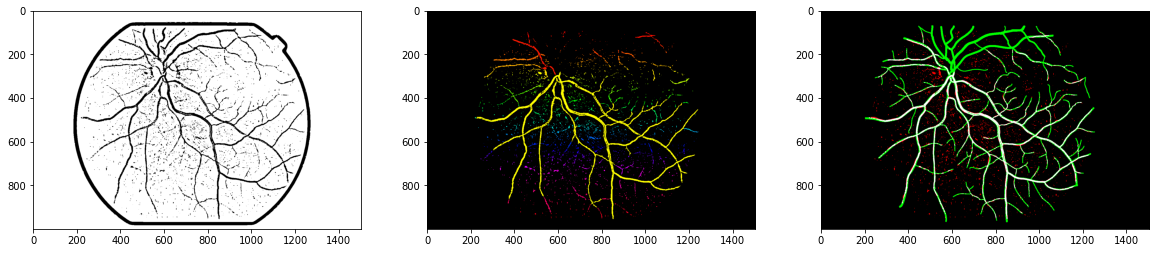

In [152]:
#Connected Component Labelling
print("Start Connected Component Labelling")
#Inverting image
imageArrayy = np.invert(resAdaptive)
output = connected_component_label(imageArrayy)
gray_img = cv.cvtColor(output, cv.COLOR_BGR2GRAY)
imageArrayOutput = cv.threshold(gray_img, 1, 255, cv.THRESH_BINARY_INV)[1]
labelled_image = performancePrams(imageArrayOutput, vesselimage)

# create figure
fig = plt.figure(figsize=(20, 20))

# setting values to rows and column variables
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(resAdaptive, cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB), cmap='gray'), plt.axis('on')
fig.add_subplot(rows, columns, 3)
#plt.imshow(gray_img, cmap='gray'), plt.axis('on')
plt.imshow(labelled_image), plt.axis('on')

'''number_list = np.array(imageArrayy)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts))
#print(frequencies)

number_list = np.array(gray_img)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts))
#print(frequencies)

#Showing Image after Component Labeling
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Image after Component Labeling")
plt.show()

#Showing Image after Component Labeling
plt.imshow(cv.cvtColor(imageArrayOutput, cv.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.show()'''